# Introduction

This is a brief introduction to **scikit-rf** (aka `skrf`).  The intended audience are those who have a working python stack, and are somewhat familiar with python. If you are completely  new to  python,  see scipy's [Getting Started](http://www.scipy.org/Getting_Started). First,  import the scikit-rf module `skrf`, as `rf`

In [1]:
import skrf as rf

If this produces an error, please see the [installation](installation.rst) tutorial.

## Networks

The central object in `skrf` is a N-port microwave [Network][Network]  object. A [Network][Network] can be created in a number of ways, one way is from data stored in a touchstone file.

[Network]: ../api/network.rst

In [2]:
ring_slot = rf.Network('data/ring slot.s2p')

If you cant find `ring slot.s2p`, then just import it from the `skrf.data` module. 


In [3]:
from skrf.data import ring_slot

A short description of the network will be printed out if entered onto the command line

In [4]:
ring_slot

2-Port Network: 'ring slot',  75.0-110.0 GHz, 201 pts, z0=[50.+0.j 50.+0.j]

The basic attributes of a microwave [Network](../api/network.rst) are provided by the 
following properties,


* `Network.s` : Scattering Parameter matrix. 
* `Network.z0`  : Port Impedance matrix.
* `Network.frequency`  : Frequency Object. 

 The [Network](../api/network.rst) object has numerous other properties and methods which can found in it's docstring. If you are using IPython/Jupyter, then these properties and methods can be 'tabbed' out on the command line. 


	In [1]: ring_slot.s<TAB>
	ring_slot.s              ring_slot.s_arcl         ring_slot.s_im
	ring_slot.s11            ring_slot.s_arcl_unwrap  ring_slot.s_mag
	...

Other way to build Network are detailed in the [tutorial on Networks](Networks.ipynb).

### Linear Operations 

	
Element-wise mathematical operations on the s-parameters are accessible through overloaded operators. To illustrate, we load a couple  `Networks` stored in the `skrf.data` module. 

In [5]:
short = rf.data.wr2p2_short
delayshort = rf.data.wr2p2_delayshort

The complex difference between their  s-parameters is computed with 

In [6]:
short - delayshort

1-Port Network: 'wr2p2,short',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j]

This returns a new [Network](../api/network.rst). Other arithmetic operators  are overloaded as well,

In [7]:
short/delayshort

1-Port Network: 'wr2p2,short',  330.0-500.0 GHz, 201 pts, z0=[50.+0.j]

### Cascading and De-embedding

Cascading and de-embeding 2-port Networks can also be done though operators. Cascading is done through the power operator,  ``**``. 

In [8]:
short = rf.data.wr2p2_short
line = rf.data.wr2p2_line

delayshort = line ** short

De-embedding  can be accomplished by cascading the *inverse* of a network. The inverse of a network is accessed through the property `Network.inv`. 

In [9]:
short = line.inv ** delayshort

For more information on the functionality provided by the [Network](../api/network.rst) object, such as interpolation, stitching, n-port connections, and IO support see the   [Networks](Networks.ipynb) tutorial.

### Finding minimum (or maximum) of a Network quantity
Often, it is desirable to get the minimum (or maximum) value of a Network quantity (s-parameters, z-parameters, etc.) and the frequency at which this occurs. In `scikit-rf`, Network quantities are stored as [Numpy](https://numpy.org/) arrays of shape ($N_F$, $N_p$, $N_p$) where $N_F$ is the number of frequency points and $N_p$ is the number of ports of a Network:

In [10]:
print(type(line.s))  # s-parameters are stored as a Numpy array

<class 'numpy.ndarray'>


In [11]:
print(line.s.shape)  # line is a 2-port Network defined on 201 frequency points

(201, 2, 2)


The frequency points are defined in the `frequency` parameter of a Network:

In [12]:
print(line.frequency)  # returns a Frequency object

330.0-500.0 GHz, 201 pts


The frequency values are given by the `frequency.f` parameter, or simply `.f`:

In [13]:
line.f[0:10]  # the 10 first frequency points. Same than line.frequency.f[0:10] 

array([3.3000e+11, 3.3085e+11, 3.3170e+11, 3.3255e+11, 3.3340e+11,
       3.3425e+11, 3.3510e+11, 3.3595e+11, 3.3680e+11, 3.3765e+11])

Being a Numpy array, finding the minimum (or maximum) value of a the magnitude of the $S_{21}$ parameter can be performed using the `min()` (or `max()`) method:

In [14]:
import numpy as np
rs = rf.data.ring_slot  # another 2-port example

print(rs.s_mag[:,1,0].min())  # or .max() for maximum. Watch out that Python indexing starts at 0!

0.5101255034355593


Finding the frequency at which the magnitude of the $S_{11}$ parameter is minimum can be performed using the Numpy function [`argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html?highlight=argmin#numpy.argmin):

In [15]:
f_match = rs.f[np.argmin(rs.s_mag[:,0,0])]  # frequency for min(|S11|)
print(f_match)

85850000000.0


## Plotting 

**skrf**  has a function which updates your  [matplotlib rcParams](http://matplotlib.org/users/customizing.html) so that plots appear like the ones shown in these tutorials. 

In [16]:
# display plots in notebook
%matplotlib inline 
from pylab import *
rf.stylely()

The methods of the [Network](../api/network.rst) class provide convenient ways to plot components of the network parameters,

* `Network.plot_s_db()` : plot magnitude of s-parameters in log scale
* `Network.plot_s_deg()` : plot phase of s-parameters in degrees
* `Network.plot_s_smith()` : plot complex s-parameters on Smith Chart

To plot all four s-parameters of the ``ring_slot``  in Mag, Phase, and on the Smith Chart.

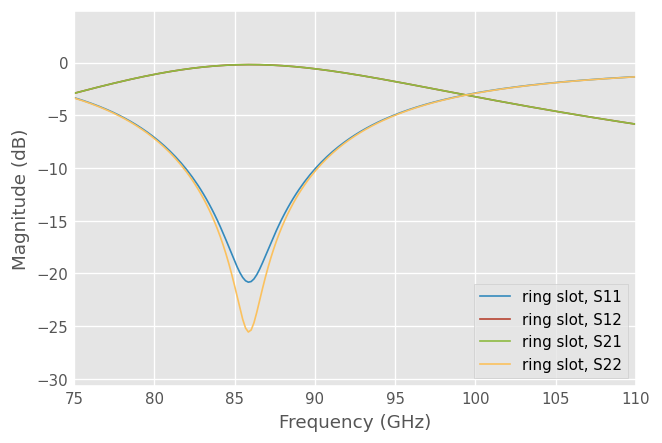

In [17]:
ring_slot.plot_s_db()

Or plot the phase of $S_{12}$

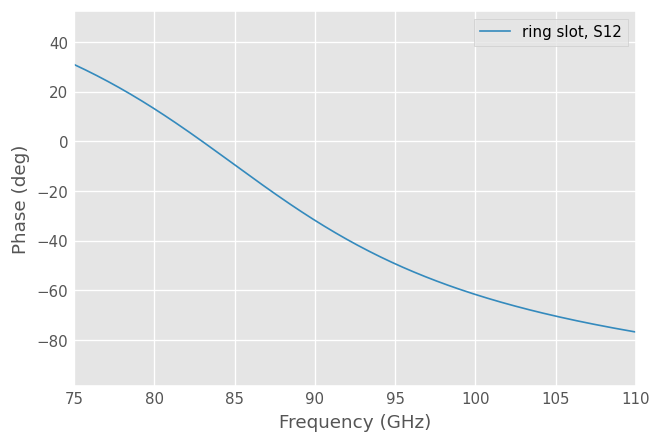

In [18]:
ring_slot.plot_s_deg(m=0,n=1)

Text(0.5, 1.0, 'Big ole Smith Chart')

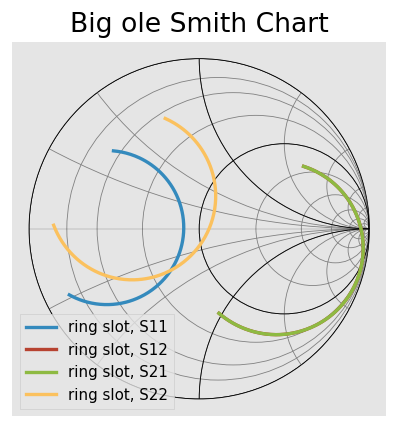

In [19]:
ring_slot.plot_s_smith(lw=2)
title('Big ole Smith Chart')

For more detailed information about plotting see the  [Plotting](Plotting.ipynb) tutorial

## NetworkSet 

The [NetworkSet](../api/networkSet.rst) object
represents an unordered  set of networks and provides  methods for 
calculating statistical quantities and displaying uncertainty bounds.

A [NetworkSet](../api/networkSet.rst) is created from a list or dict of 
[Networks](../api/network.rst)'s.  This can be done quickly with 
`rf.read_all()` , which loads all skrf-readable objects
in a directory. The argument ``contains`` is used to load only files 
which match a given substring. 


In [20]:
rf.read_all('data/', contains='ro')

{'ro,1': 1-Port Network: 'ro,1',  500.0-750.0 GHz, 201 pts, z0=[50.+0.j],
 'ro,2': 1-Port Network: 'ro,2',  500.0-750.0 GHz, 201 pts, z0=[50.+0.j],
 'ro,3': 1-Port Network: 'ro,3',  500.0-750.0 GHz, 201 pts, z0=[50.+0.j]}

This dictionary can be passed directly to the [NetworkSet](../api/networkSet.rst) constructor, 

In [21]:
from skrf import NetworkSet

ro_dict = rf.read_all('data/', contains='ro')
ro_ns = NetworkSet(ro_dict, name='ro set') # name is optional
ro_ns

3-Networks NetworkSet: [1-Port Network: 'ro,1',  500.0-750.0 GHz, 201 pts, z0=[50.+0.j], 1-Port Network: 'ro,2',  500.0-750.0 GHz, 201 pts, z0=[50.+0.j], 1-Port Network: 'ro,3',  500.0-750.0 GHz, 201 pts, z0=[50.+0.j]]

[NetworkSet](../api/networkSet.rst)'s are list-like. 

### Statistical Properties

Statistical quantities can be calculated by accessing 
properties of the [NetworkSet](../api/networkSet.rst). For example, to calculate the complex 
average of the set, access the ``mean_s`` property

In [22]:
ro_ns.mean_s

1-Port Network: 'ro set',  500.0-750.0 GHz, 201 pts, z0=[50.+0.j]

The returned  results are stored in a [Network](../api/network.rst)s s-parameters, regardless of the type of the output. Similarly, to calculate the complex standard deviation of the set, 

In [23]:
ro_ns.std_s

1-Port Network: 'ro set',  500.0-750.0 GHz, 201 pts, z0=[50.+0.j]

Because these methods return a [Network](../api/network.rst) object  the results can be 
saved or plotted in the same way as you would with a [Network](../api/network.rst). To plot the magnitude of the standard deviation of the set,  

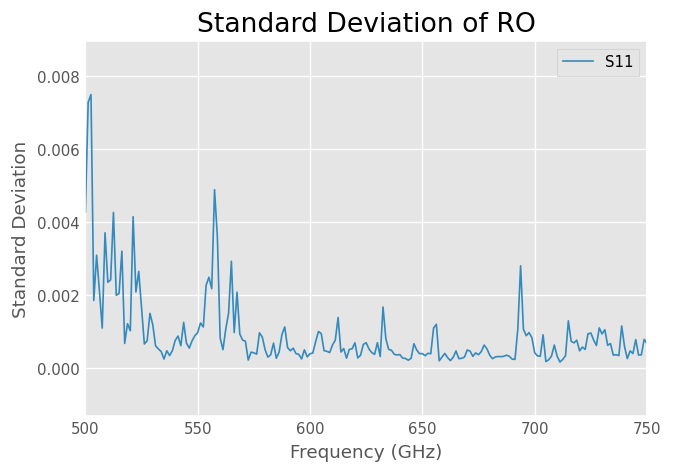

In [24]:
ro_ns.std_s.plot_s_mag(label='S11')
ylabel('Standard Deviation')
title('Standard Deviation of RO');

### Plotting Uncertainty Bounds

Uncertainty bounds on any network parameter can be plotted through the methods 

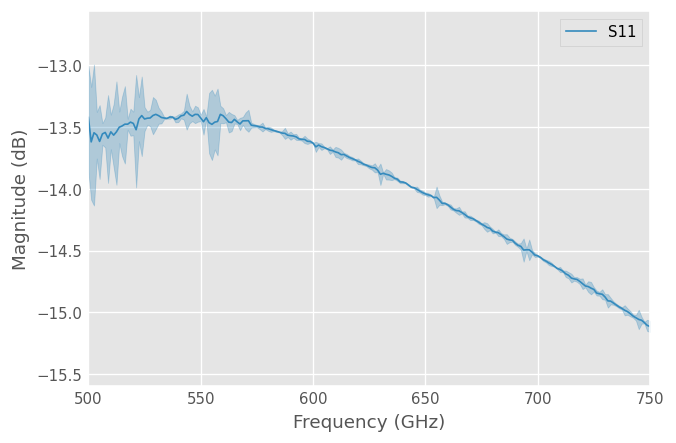

In [25]:
ro_ns.plot_uncertainty_bounds_s_db(label='S11');

See the [networkset](networkset.rst) tutorial for more information.

## Virtual Instruments

    
The [skrf.vi](../api/vi/index.html) module holds  classes
for GPIB/VISA instruments that are intricately related to skrf, mostly VNA's.
The VNA classes were created for the sole purpose of retrieving data 
so that calibration and analysis could be done offline by skrf, so
 most other VNA capabilities is neglected.


A list of VNA's that are partially supported.

    

An example of using the `PNA` class to retrieve some s-parameter data

    from skrf.vi import vna
    my_vna = vna.PNA(address=16) 
    
    #if an error is thrown at this point there is most likely a problem with your visa setup
        
    dut_1 = my_vna.s11
    dut_2 = my_vna.s21
    dut_3 = my_vna.two_port

See the [Virtual Instruments](VirtualInstruments.ipynb) tutorial for more information.

## Calibration

Calibrations are performed through a [Calibration](../api/calibration/index.rst) class. In most cases, creating
a [Calibration](../api/calibration/index.rst) object requires at least two pieces of information:

*   a list of measured [Network](../api/network.rst)'s
*   a list of ideal [Network](../api/network.rst)'s

The [Network](../api/network.rst) elements in each list must all be similar (same #ports, frequency info, etc) and must be aligned to each other, meaning the first element of ideals list must correspond to the first element of measured list.

Below is an example script illustrating how to create a [Calibration](../api/calibration/index.rst) .


### One Port Calibration

    import skrf as rf
    from skrf.calibration import OnePort
    
    my_ideals = rf.read_all('ideals/')
    my_measured = rf.read_all('measured/')
    duts = rf.read_all('measured/')
    
    ## create a Calibration instance
    cal = rf.OnePort(
        ideals = [my_ideals[k] for k in ['short','open','load']],
        measured = [my_measured[k] for k in ['short','open','load']],
        )
    
    caled_duts = [cal.apply_cal(dut) for dut in duts.values()]
    
See the [Calibration](Calibration.ipynb) tutorial for more details and examples. 

## Transmission Line  Media

Simple transmission-line based networks can be created through methods of the [Media](../api/media/index.rst) class, which represents a transmission line object for a given medium. Once constructed, a [Media](../api/media/index.rst) object contains the necessary properties such as ``propagation constant`` and ``characteristic impedance``, that are needed to generate microwave circuits.

The basic usage looks something like this,  


### CPW


In [26]:
from skrf import Frequency
from skrf.media import CPW, Coaxial 

freq = Frequency(75,110,101,'ghz')
cpw =  CPW(freq, w=10e-6, s=5e-6, ep_r=10.6)
cpw

Coplanar Waveguide Media.  75-110 GHz.  101 points
 W= 1.00e-05m, S= 5.00e-06m

In [27]:
cpw.line(d=90,unit='deg', name='line')

2-Port Network: 'line',  75.0-110.0 GHz, 101 pts, z0=[50.06074662+0.j 50.06074662+0.j]

### Coax

In [28]:
freq = Frequency(1,10,101,'ghz')
coax = Coaxial(frequency=freq, Dint=1e-3, Dout=2e-3)
coax

Coaxial Transmission Line.  1-10 GHz.  101 points
Dint= 1.00 mm, Dout= 2.00 mm 
Characteristic Impedance=(41.6,-0.0j)-(41.6,-0.0j) Ohm
Port impedance Z0=(41.6,-0.0j)-(41.6,-0.0j) Ohm